<center><h1> Final Assignment - Machine Learning 2015-2016</h1></center>
<a id='top'></a>
<div style="margin-top:1cm">Author: Afentoulidis Gregory</div>
<div>Student ID : 4521862</div>

<h3>Table of contents</h3>
<ul>
    <li><a href='#imports'>Import modules and data</a></li>
    <li><a href='#eda'>Exploratory Data Analysis on dataset features</a>
    <ul>
        <li><a href='#age'>Analysis of age feature</a></li>
        <li><a href='#work_class'>Analysis of work_class feature</a></li>
        <li><a href='#marital_status'>Analysis of the marital_status feature</a></li>
        <li><a href='#occupation'>Analysis of the occupation feature</a></li>
        <li><a href='#race'>Analysis of the race feature</a></li>
        <li><a href='#working_hours'>Analysis of the work_hours feature</a></li>
        <li><a href='#investment_features'>Analysis of the investment features</a></li>
        <li><a href='#edu_feature'>Analysis of years of education feature</a></li>
    </ul> 
    </li>
    
    <li><a href='#imputations'>Imputation Strategies</a>
        <ul>
            <li><a href='#preimp'>Preimputation strategy (Based on EDA)</a></li>
            <li><a href='#strategy1'>Strategy 1</a></li>
            <li><a href='#strategy2'>Strategy 2</a></li>
            <li><a href='#strategy3'>Strategy 3</a></li>
        </ul>
    </li>
    
    <li><a href='#nb'>Naive Bayes Classifier (NBC)</a>
        <ul>
            <li><a href='#nbnostr'>NBC all features and strategies</a></li>
            <li><a href='#nbelim'>NBC eliminating interdependent features</a></li>
        </ul>
    </li>
    
    <li><a href='#lr'>Logistic Regression Classifier</a>
        <ul>
            <li><a href='#lrcoefs'>Coefficient weights per regularization parameter</a></li>
            <li><a href='#regvalcurves'> Regularization parameter validation curves</a></li>
            <li><a href='#bestlr'>Best LR out of three</a></li>
            <li><a href='#learncurve'>Learning curve for LR and Strategy 1</a></li>
        </ul>
    </li>
    
    <li><a href='#ada'>AdaBoost</a>
        <ul>
            <li><a href='#gsestimators'> Grid Search for number of estimators</a></li>
            <li><a href='#gslearning'>Grid Search for learning rate</a></li>
        </ul>
    </li>
</ul>

<a id="imports"></a>
<center> <h2> Import modules and data</h2></center>
<div style="text-align:right">
<a href="#top">[Back to top]</a>
</div>

In [1]:
# IMPORTS
% matplotlib inline
from __future__ import division
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from IPython.display import display
import seaborn as sns

In [2]:
features = ['age','work_class','education','years_education','marital_status',
            'occupation','relationship','race','sex','income_inv','loss_inv','work_hours','country','target']
categorical = ['work_class','education','marital_status','occupation','relationship','race','sex','country']
numerical = ['age','years_education','income_inv','loss_inv','work_hours']
#feat_types = {'work_class':np.int32,'education':np.int32,'marital_status':np.int32,
#             'occupation':np.int32,'relationship':np.int32,'race':np.int32,'sex':np.int32,'country':np.int32}

train = pd.read_csv("train",header=None,names=features)
test = pd.read_csv('test',header=None,names = features[:-1])

In [3]:
train.head()

,age,work_class,education,years_education,marital_status,occupation,relationship,race,sex,income_inv,loss_inv,work_hours,country,target
0,12.4140,92.0,20.0,NaN,65.0,14.0,68.0,101.0,59.0,692.01,NaN,NaN,NaN,0
1,NaN,88.0,NaN,NaN,61.0,NaN,49.0,101.0,59.0,0.00,0.0,4.138,98.0,0
2,12.0960,80.0,42.0,NaN,28.0,44.0,68.0,101.0,NaN,0.00,0.0,12.732,NaN,0
3,NaN,80.0,3.0,NaN,NaN,44.0,49.0,NaN,59.0,NaN,0.0,12.732,98.0,0
4,8.9127,80.0,NaN,4.138,61.0,82.0,103.0,21.0,NaN,NaN,0.0,12.732,27.0,0


In [4]:
instancesZero = train[train['target']==0].shape[0]
instancesOne = train[train['target']==1].shape[0]
print "Instances of class 0 : %d"%(instancesZero)
print "Instances of class 1 : %d"%(instancesOne)
print "Ratio is : %f"%(instancesOne/instancesZero if instancesZero>instancesOne\
                       else instancesZero/instancesOne)

Instances of class 0 : 8000
Instances of class 1 : 2500
Ratio is : 0.312500


In [5]:
# A function to make a submission file for the competition
# Inputs : a prefix of the file name, the classifier, and the test data
def makeSubmission(prefix,clf,test):
    with open(prefix+"Submission.csv",'w') as f:
        f.write("Id,Prediction\n")
        preds = clf.predict(test)
        for idx,pred in enumerate(preds):
            f.write("%d,%d\n"%(idx+1,pred))

In [6]:
from scipy.stats import ttest_ind,kstest
ageClass0 = train[train['target']==0]['age'].dropna()
ageClass1 = train[train['target']==1]['age'].dropna()
print kstest(ageClass0.values,'norm')
print kstest(ageClass1.values,'norm')
ttest_ind(ageClass0,ageClass1,equal_var=0)

KstestResult(statistic=0.99999996871557562, pvalue=0.0)
KstestResult(statistic=0.99999999926627003, pvalue=0.0)


Ttest_indResult(statistic=-25.326950854222307, pvalue=1.2090826606313243e-132)

In [7]:
train.columns

Index([u'age', u'work_class', u'education', u'years_education',
       u'marital_status', u'occupation', u'relationship', u'race', u'sex',
       u'income_inv', u'loss_inv', u'work_hours', u'country', u'target'],
      dtype='object')

<a id="eda"></a>
<center> <h2> Exploratory Data Analysis on the dataset features</h2></center>
<div style="text-align:right">
<a href="#top">[Back to top]</a>
</div>

In [8]:
#Combine training and test set with missing values
train.ix[:,:-1].head()
allData = pd.concat([train.ix[:,:-1],test])
# Keep only instances where all features are existent
clearAllData = allData[~allData.isnull().any(axis=1)]

<a id="age"></a>
<h3> Analysis of age feature</h3>
<div style="text-align:right">
<a href="#top">[Back to top]</a>
</div>

<div style="font-size:17px;font-family:Verdana"><p> In this section we see the distribution of the age feature and we also see that age is correlated to the marital_status feature. We will impute missing age data with the mean age value per marital_status</p>
</div>

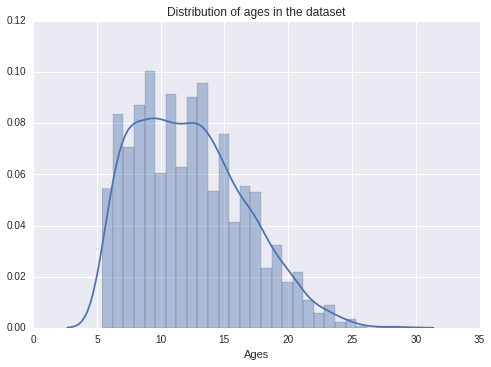

In [39]:
#Analysis of the age feature from the clearAllData
sns.distplot(clearAllData.age.values)
_ = plt.title("Distribution of ages in the dataset")
_ = plt.xlabel("Ages")

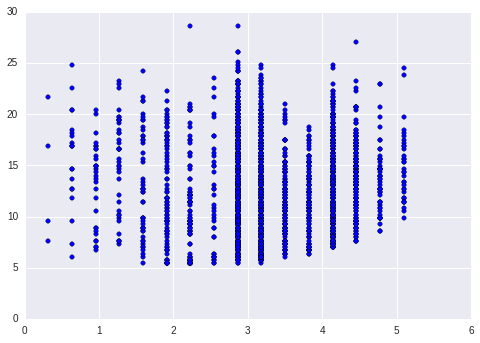

In [42]:
# No correlation between the years of education and the age of the sample
_ = plt.scatter(clearAllData.years_education.values,clearAllData.age.values)

In [56]:
# We can predict with the mean of each of the marital_status feature
clearAllData.groupby(['marital_status'])['age'].describe()

marital_status       
28.0            count     416.000000
                mean       13.677364
                std         3.336949
                min         6.684500
                25%        11.141000
                50%        13.687000
                75%        15.915000
                max        23.237000
60.0            count       2.000000
                mean        8.594350
                std         1.350503
                min         7.639400
                25%         8.116875
                50%         8.594350
                75%         9.071825
                max         9.549300
61.0            count    1398.000000
                mean       13.731487
                std         3.816238
                min         5.729600
                25%        10.823000
                50%        13.369000
                75%        16.234000
                max        26.101000
62.0            count      35.000000
                mean       13.950997
                

In [17]:
marAge = clearAllData.groupby(['marital_status'])['age'].agg(['mean','median'])
display(marAge)

,mean,median
marital_status,,
28.0,13.677364,13.68700
60.0,8.594350,8.59435
61.0,13.731487,13.36900
62.0,13.950997,14.96100
65.0,8.975300,7.95770
89.0,12.478342,12.41400
102.0,18.433326,18.78000


In [18]:
marToAgeDict = marAge['mean'].to_dict()
marToAgeDict = {k:round(v,2) for k,v in marToAgeDict.items() }
marToAgeDict

{28.0: 13.68,
 60.0: 8.59,
 61.0: 13.73,
 62.0: 13.95,
 65.0: 8.98,
 89.0: 12.48,
 102.0: 18.43}

<a id="work_class"></a>
<h3> Analysis of work_class feature</h3>
<div style="text-align:right">
<a href="#top">[Back to top]</a>
</div>

<div style="font-size:17px;font-family:Verdana"><p> The work_class feature is not directly correlated with other features but it is noticed that a heavy majority of the instances has a specific value. We will use this specific value (80) to impute any missing data for this feature</p>
</div>

In [88]:
# Analysis of the work_class feature
eduWork = clearAllData.groupby(['education','work_class'])['work_class']\
                                .count()\
                                .unstack()
display(eduWork)

work_class,36.0,57.0,80.0,87.0,88.0,92.0,104.0
education,,,,,,,
2.0,1.0,3.0,73.0,1.0,8.0,NaN,NaN
3.0,NaN,1.0,95.0,NaN,7.0,1.0,NaN
4.0,1.0,2.0,31.0,NaN,4.0,NaN,NaN
5.0,NaN,NaN,17.0,NaN,3.0,NaN,NaN
6.0,NaN,1.0,28.0,NaN,1.0,NaN,NaN
7.0,NaN,NaN,26.0,2.0,9.0,2.0,NaN
8.0,NaN,1.0,44.0,2.0,1.0,NaN,NaN
18.0,4.0,6.0,84.0,6.0,7.0,6.0,NaN
19.0,1.0,8.0,97.0,2.0,14.0,5.0,NaN


In [95]:
# Work_class =80 is dominating the dataset
clearAllData.work_class.value_counts()

80.0     2256
88.0      251
57.0      205
92.0      120
36.0      103
87.0       99
104.0       1
Name: work_class, dtype: int64

In [99]:
clearAllData.groupby(['country','work_class'])['work_class']\
                                .count()\
                                .unstack()

work_class,36.0,57.0,80.0,87.0,88.0,92.0,104.0
country,,,,,,,
22.0,NaN,NaN,3.0,NaN,NaN,NaN,NaN
23.0,NaN,1.0,10.0,1.0,2.0,1.0,NaN
24.0,NaN,NaN,4.0,NaN,1.0,1.0,NaN
25.0,NaN,NaN,7.0,NaN,NaN,NaN,NaN
27.0,NaN,1.0,5.0,NaN,2.0,NaN,NaN
30.0,NaN,NaN,9.0,NaN,NaN,NaN,NaN
31.0,NaN,NaN,6.0,NaN,NaN,NaN,NaN
32.0,NaN,1.0,8.0,NaN,NaN,NaN,NaN
33.0,NaN,NaN,6.0,NaN,1.0,NaN,NaN


<a id="marital_status"></a>
<h3> Analysis of marital_status feature</h3>
<div style="text-align:right">
<a href="#top">[Back to top]</a>
</div>

<div style="font-size:17px;font-family:Verdana"><p> We see that marital_status feature is correlated with the relationship feature. We use a Naive Bayes approach to impute the missing data for the two features</p>
</div>

In [9]:
# Analysis of the marital_status feature
relMar = clearAllData.groupby(['marital_status','relationship'])['relationship']\
.count().unstack()
display(relMar)

relationship,49.0,68.0,70.0,73.0,99.0,103.0
marital_status,,,,,,
28.0,NaN,215.0,13.0,28.0,160.0,NaN
60.0,NaN,NaN,NaN,NaN,NaN,2.0
61.0,1232.0,2.0,13.0,9.0,NaN,142.0
62.0,NaN,13.0,3.0,3.0,16.0,NaN
65.0,NaN,454.0,47.0,409.0,76.0,NaN
89.0,NaN,54.0,4.0,11.0,40.0,NaN
102.0,NaN,50.0,5.0,2.0,32.0,NaN


In [112]:
#Apparent error of naive_bayes for predicion of relationship on marital
# status
ss = 0
for i in range(relMar.shape[0]):
    ss+= relMar.iloc[i,:].max()
print "Apparent error of NB prediction : {0}".format(ss/relMar.sum().sum())

Apparent error of NB prediction : 0.666556836903


In [10]:
relMarDict = relMar.idxmax().to_dict()

In [11]:
relMarDict

{49.0: 61.0, 68.0: 65.0, 70.0: 65.0, 73.0: 65.0, 99.0: 28.0, 103.0: 61.0}

In [12]:
marRel = clearAllData.groupby(['relationship','marital_status'])['marital_status'].count().unstack()
display(marRel)

marital_status,28.0,60.0,61.0,62.0,65.0,89.0,102.0
relationship,,,,,,,
49.0,NaN,NaN,1232.0,NaN,NaN,NaN,NaN
68.0,215.0,NaN,2.0,13.0,454.0,54.0,50.0
70.0,13.0,NaN,13.0,3.0,47.0,4.0,5.0
73.0,28.0,NaN,9.0,3.0,409.0,11.0,2.0
99.0,160.0,NaN,NaN,16.0,76.0,40.0,32.0
103.0,NaN,2.0,142.0,NaN,NaN,NaN,NaN


In [13]:
marRelDict = marRel.idxmax().to_dict()

In [14]:
marRelDict

{28.0: 68.0,
 60.0: 103.0,
 61.0: 49.0,
 62.0: 99.0,
 65.0: 68.0,
 89.0: 68.0,
 102.0: 68.0}

<a id="occupation"></a>
<h3> Analysis of occupation feature</h3>
<div style="text-align:right">
<a href="#top">[Back to top]</a>
</div>

<div style="font-size:17px;font-family:Verdana"><p>We notice a correlation of the occupation feature with the sex feature for some categories of sex and occupation the discrepancy is greater. We will use a NB approach to impute missing data ONLY for sex depending on occupation</p>
</div>

In [36]:
# Analysis of the occupation feature
occSex = clearAllData.groupby(['occupation','sex'])['sex']\
.count().unstack()
display(occSex)
sexOcc = clearAllData.groupby(['sex','occupation'])['occupation']\
.count().unstack()
display(sexOcc)

sex,37.0,59.0
occupation,,
14.0,258,139
26.0,20,385
34.0,113,270
35.0,6,97
44.0,16,116
58.0,55,169
71.0,199,142
79.0,10,2
82.0,127,267


occupation,14.0,26.0,34.0,35.0,44.0,58.0,71.0,79.0,82.0,83.0,85.0,94.0,96.0
sex,,,,,,,,,,,,,
37.0,258,20,113,6,16,55,199,10,127,9,142,32,7
59.0,139,385,270,97,116,169,142,2,267,51,214,57,132


In [38]:
occSexDict = {}
for idx,occ in enumerate(occSex.index):
    occSexDict[occ] = occSex.iloc[idx,:].argmax()
occSexDict

{14.0: 37.0,
 26.0: 59.0,
 34.0: 59.0,
 35.0: 59.0,
 44.0: 59.0,
 58.0: 59.0,
 71.0: 37.0,
 79.0: 37.0,
 82.0: 59.0,
 83.0: 59.0,
 85.0: 59.0,
 94.0: 59.0,
 96.0: 59.0}

<a id="race"></a>
<h3> Analysis of race feature</h3>
<div style="text-align:right">
<a href="#top">[Back to top]</a>
</div>

<div style="font-size:17px;font-family:Verdana"><p> We see a correlation of the race feature with the country of origin we will again choose a NB approach to fill missing values between these two features</p>
</div>

In [59]:
# Analysis of race feature
countryRace = clearAllData.groupby(['country','race'])['race'].count().unstack()
display(countryRace)

race,15.0,17.0,21.0,69.0,101.0
country,,,,,
22.0,NaN,3.0,NaN,NaN,NaN
23.0,NaN,NaN,NaN,NaN,15.0
24.0,NaN,6.0,NaN,NaN,NaN
25.0,NaN,NaN,NaN,1.0,6.0
27.0,NaN,NaN,NaN,NaN,8.0
30.0,NaN,NaN,1.0,2.0,6.0
31.0,NaN,NaN,NaN,1.0,5.0
32.0,NaN,NaN,NaN,3.0,6.0
33.0,NaN,NaN,NaN,NaN,7.0


In [60]:
countryToRaceDict = {}
for idx,country in enumerate(countryRace.index):
    countryToRaceDict[country] = countryRace.iloc[idx,:].argmax()
countryToRaceDict

{22.0: 17.0,
 23.0: 101.0,
 24.0: 17.0,
 25.0: 101.0,
 27.0: 101.0,
 30.0: 101.0,
 31.0: 101.0,
 32.0: 101.0,
 33.0: 101.0,
 38.0: 101.0,
 39.0: 101.0,
 40.0: 101.0,
 41.0: 101.0,
 43.0: 21.0,
 46.0: 101.0,
 47.0: 17.0,
 50.0: 17.0,
 51.0: 17.0,
 52.0: 101.0,
 53.0: 101.0,
 54.0: 21.0,
 55.0: 17.0,
 56.0: 17.0,
 64.0: 101.0,
 67.0: 101.0,
 72.0: 101.0,
 74.0: 101.0,
 75.0: 17.0,
 76.0: 101.0,
 77.0: 101.0,
 84.0: 101.0,
 86.0: 101.0,
 91.0: 17.0,
 93.0: 17.0,
 97.0: 21.0,
 98.0: 101.0,
 100.0: 17.0,
 105.0: 101.0}

<a id="working_hours"></a>
<h3> Analysis of working_hours feature</h3>
<div style="text-align:right">
<a href="#top">[Back to top]</a>
</div>

<div style="font-size:17px;font-family:Verdana"><p> There was not a notable correlation of the work_hours with any other feature in the data set. Still the distribution of the feature values reveal the dominance of one value and also that although the feature is of numerical nature we only encounter 70 different values in the data set</p>
</div>

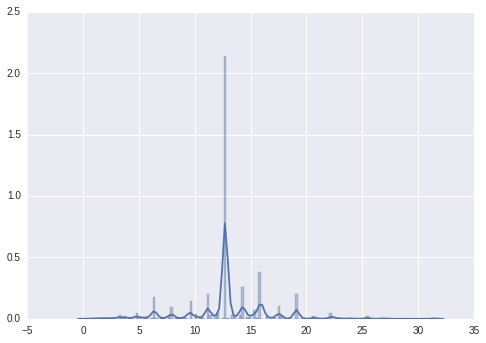

In [123]:
#Analysis of working hours per week
_ = sns.distplot(clearAllData.work_hours.values)

In [124]:
clearAllData.work_hours.describe()

count    3035.000000
mean       12.911543
std         3.781979
min         0.318310
25%        12.732000
50%        12.732000
75%        14.324000
max        31.513000
Name: work_hours, dtype: float64

<a id="investment_features"></a>
<h3> Analysis of investment features</h3>
<div style="text-align:right">
<a href="#top">[Back to top]</a>
</div>

<div style="font-size:17px;font-family:Verdana"><p> To summarize the analysis conducted in this section, we found out that there is no instance in the training set where both the investment features are above zero. This was found by the amount of instances in the training set which do not have a missing value in either those features (~65% of the total training samples). This results in a rather simple imputation strategy for the rest of the instances where we can apply two simple rules:</p>

<ol>
<li> We impute zero value for each missing investment feature of an instance where there is an existent value for the other investment feature (regardless of which is which)</li>
<li> We impute zero value for both features when there are missing values for both features for the instance</li>
</ol>
</div>

In [109]:
# The percentiles of income from investments for the top 10% of the values
train.income_inv.dropna().describe(percentiles=
                                   [.91,.92,.93,.94,.95,.96,.97,.98,.99,1])

count     8519.000000
mean       336.549559
std       2337.582458
min          0.000000
50%          0.000000
91%          0.000000
92%        290.940000
93%        826.650000
94%       1102.600000
95%       1480.100000
96%       2323.000000
97%       2447.200000
98%       4483.100000
99%       4782.300000
100%     31831.000000
max      31831.000000
Name: income_inv, dtype: float64

target,0,1
income_inv,,
"[290.94, 998.54]",117,21
"(998.54, 1595.7]",131,30
"(1595.7, 2447.2]",12,151
"(2447.2, 4782.3]",4,151
"(4782.3, 31831]",4,63


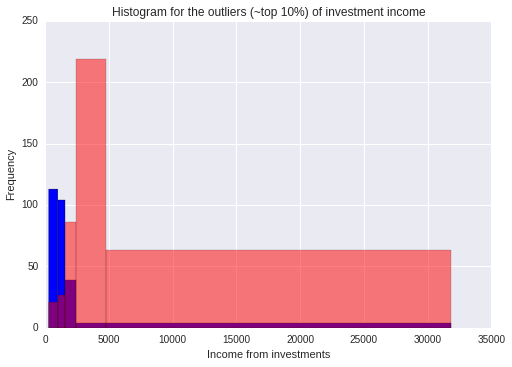

In [154]:
# Histogram of the top 10% values per target variable
income90 = train[train.income_inv>200]
factor = pd.qcut(income90.income_inv,5)

income_buckanalysis = income90.groupby([factor,'target'])['target'].count().unstack()
display(income_buckanalysis)

plt.hist(income90[income90.target==0]['income_inv'],
         [291,999,1560,2447,4783,31831],align='mid',alpha=1,color='blue',
        label='target_0')
plt.hist(income90[income90.target==1]['income_inv'].values,
         [291,999,1560,2447,4783,31831],align='mid',alpha=0.5,color='red',
        label='target_1')
plt.grid(True)
plt.title("Histogram for the outliers (~top 10%) of investment income")
plt.ylabel("Frequency")
plt.xlabel('Income from investments')


In [115]:
train.loss_inv.dropna().describe(percentiles=
                                [.91,.92,.93,.94,.95,.96,.97,.98,.99,1])

count    8502.000000
mean       26.504846
std       124.426967
min         0.000000
50%         0.000000
91%         0.000000
92%         0.000000
93%         0.000000
94%         0.000000
95%         0.000000
96%       472.690000
97%       553.860000
98%       605.430000
99%       629.300000
100%     1386.600000
max      1386.600000
Name: loss_inv, dtype: float64

In [152]:
loss95 = train[train.loss_inv>400]
display(loss95.head(5))
lossfactor = pd.qcut(loss95.loss_inv,5)
loss_bucketanalysis = loss95.groupby([lossfactor,'target'])['target'].count().unstack()
display(loss_bucketanalysis)

,age,work_class,education,years_education,marital_status,occupation,relationship,race,sex,income_inv,loss_inv,work_hours,country,target
15,13.6870,80.0,3.0,NaN,61.0,96.0,49.0,101.0,59.0,0.0,649.99,12.7320,NaN,0
22,14.3240,80.0,20.0,NaN,28.0,34.0,73.0,101.0,NaN,0.0,448.18,12.7320,98.0,0
71,9.5493,80.0,42.0,2.8648,61.0,85.0,NaN,17.0,37.0,0.0,500.70,NaN,NaN,0
93,NaN,80.0,90.0,3.1831,65.0,NaN,73.0,101.0,37.0,0.0,547.17,8.9127,98.0,0
97,7.6394,80.0,42.0,2.8648,NaN,71.0,68.0,101.0,NaN,0.0,560.86,12.7320,98.0,0


target,0,1
loss_inv,,
"[400.43, 509.93]",54,21
"(509.93, 597.15]",71,12
"(597.15, 605.43]",2,74
"(605.43, 636.94]",14,50
"(636.94, 1386.6]",36,36


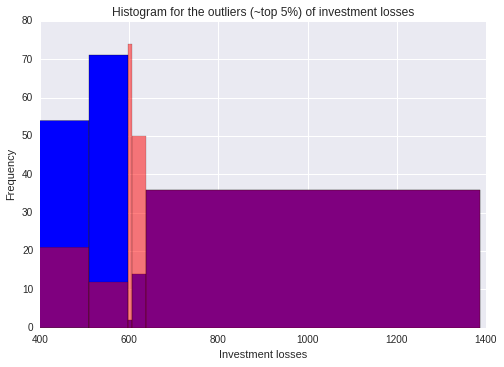

In [155]:
plt.hist(loss95[loss95.target==0]['loss_inv'].values,bins=[400,510,598,606,637,1387],alpha=1,color='blue',align='mid')
plt.hist(loss95[loss95.target==1]['loss_inv'].values,bins=[400,510,598,606,637,1387],alpha=.5,color='red',align='mid')
plt.grid(1)
plt.title("Histogram for the outliers (~top 5%) of investment losses")
plt.xlabel("Investment losses")
plt.ylabel("Frequency")

In [144]:
# trainInv is the df with all the instances where values for investments both exist
trainInv = train[~train.isnull()[['income_inv','loss_inv']].any(axis=1)][['income_inv','loss_inv']]
print '''There are %d instances in the training set with both investment values'''\
%(trainInv.shape[0])

# How many pairs of values are both non zero for investments??
print '''There are %d instances in the training set with both investment values
equal to zero'''%(trainInv[(trainInv.income_inv==0) & (trainInv.loss_inv==0)].shape[0])
print '''There are %d instances in the training set with at least on investment value
above zero'''%(trainInv[(trainInv.income_inv>0) | (trainInv.loss_inv>0)].shape[0])
print '''There are %d instances in the training set with both investment values
above zero'''%(trainInv[(trainInv.income_inv>0) & (trainInv.loss_inv>0)].shape[0])

There are 6908 instances in the training set with both investment values
There are 6025 instances in the training set with both investment values
equal to zero
There are 883 instances in the training set with at least on investment value
above zero
There are 0 instances in the training set with both investment values
above zero


In [148]:
# How many instances with both investment
# features missing in the training set?
print "%d of the instances have both the investment features missing"\
        %(train[['income_inv','loss_inv']].isnull().all(axis=1).sum())

387 of the instances have both the investment features missing


In [150]:
# Ok so we can easily impute all the values from this observation to the investment features
# but are the population representantive of the whole training set?
trainInvAll = train[~train.isnull()[['income_inv','loss_inv']].any(axis=1)]
for cat in categorical:
    groupFeat(trainInvAll,cat)

work_class
36.0     151
57.0     347
80.0    3912
87.0     184
88.0     458
92.0     225
Name: work_class, dtype: int64

education
2.0      168
3.0      204
4.0       60
5.0       28
6.0       48
7.0      123
8.0       91
18.0     182
19.0     233
20.0     916
29.0      64
42.0    1803
63.0     291
78.0      11
81.0      92
90.0    1317
Name: education, dtype: int64

marital_status
28.0      770
60.0        2
61.0     2593
62.0       82
65.0     1849
89.0      194
102.0     168
Name: marital_status, dtype: int64

occupation
14.0    669
16.0      1
26.0    701
34.0    651
35.0    169
44.0    230
58.0    360
71.0    607
79.0     21
82.0    688
83.0    122
85.0    665
94.0    155
96.0    258
Name: occupation, dtype: int64

relationship
49.0     2240
68.0     1443
70.0      156
73.0      889
99.0      566
103.0     271
Name: relationship, dtype: int64

race
15.0       60
17.0      181
21.0      525
69.0       52
101.0    4773
Name: race, dtype: int64

sex
37.0    1864
59.0    3746
Name: sex, dtype: int64

country
22.0        3
23.0       32
24.0       17
25.0        6
27.0       13
30.0       13
31.0        4
32.0       18
33.0       19
38.0        2
39.0       26
40.0       11
41.0       13
43.0        9
46.0        3
47.0        1
48.0        1
50.0       12
51.0        9
52.0        3
53.0        9
54.0       18
55.0       10
56.0        3
64.0      103
67.0        4
72.0        2
74.0        4
75.0       32
76.0        8
77.0        5
84.0       24
86.0        1
91.0       15
93.0       10
95.0        4
97.0        1
98.0     5035
100.0      11
105.0       4
Name: country, dtype: int64

<a id="edu_feature"></a>
<center> <h2> Analysis of years of education feature</h2></center>
<div style="text-align:right">
<a href="#top">[Back to top]</a>
</div>

<div style="font-size:17px;font-family:Verdana"><p> Years of education and education type have a 1:1 relation of values.That means that on of the features can be omitted from the models since there are redundant information in the data set</p>
</div>

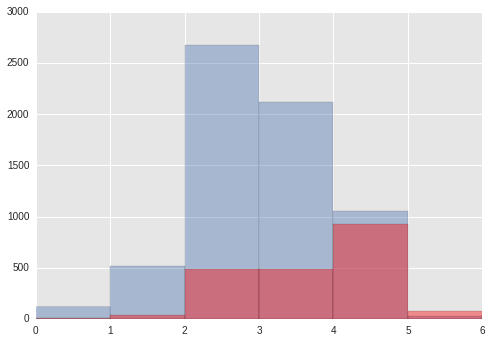

In [186]:
sns.distplot(train[train.target==0]['years_education'].dropna().values,bins=[0,1,2,3,4,5,6],kde=0)
sns.distplot(train[train.target==1]['years_education'].dropna().values,bins=range(0,7),color='red',kde=0)

In [27]:
edu_years = clearAllData.groupby(['years_education','education'])['education'].count().dropna()
display(edu_years)

years_education  education
0.31831          78.0           4
0.63662          5.0           20
0.95493          6.0           30
1.27320          7.0           39
1.59150          8.0           48
1.90990          2.0           86
2.22820          3.0          104
2.54650          4.0           38
2.86480          42.0         959
3.18310          90.0         710
3.50140          19.0         127
3.81970          18.0         113
4.13800          20.0         513
4.45630          63.0         157
4.77460          81.0          53
5.09300          29.0          34
Name: education, dtype: int64

In [28]:
cros = pd.crosstab(train.education,train.years_education)

In [29]:
eduToyears = {}
for idx,edu in enumerate(cros.index):
    eduToyears[edu] = round(cros.iloc[idx,:].idxmax(),2)

In [30]:
eduToyears

{2.0: 1.91,
 3.0: 2.23,
 4.0: 2.55,
 5.0: 0.64,
 6.0: 0.95,
 7.0: 1.27,
 8.0: 1.59,
 18.0: 3.82,
 19.0: 3.5,
 20.0: 4.14,
 29.0: 5.09,
 42.0: 2.86,
 63.0: 4.46,
 78.0: 0.32,
 81.0: 4.77,
 90.0: 3.18}

In [31]:
yearsToEdu = {0.31831:78.0,
              0.63662:5.0,
              0.95493:6.0,
              1.27320:7.0,
              1.59150:8.0,
              1.90990:2.0,
              2.22820:3.0,
              2.54650:4.0,
              2.86480:42.0,
              3.18310:90.0,
              3.50140:19.0,
              3.81970:18.0,
              4.13800:20.0,
              4.45630:63.0,
              4.77460:81.0,
              5.09300:29.0}

<a id="imputations"></a>
<center> <h2> Imputation strategies</h2></center>
<div style="text-align:right">
<a href="#top">[Back to top]</a>
</div>

<a id="preimp"></a>
<h3> Preimputation strategy (Based on EDA)</h3>
<div style="text-align:right">
<a href="#top">[Back to top]</a>
</div>



In [22]:
# relMarDict -> mapping from relationship to marital_status
# marRelDict -> mapping from marital_status to relationship
trainimputed = train.copy(deep=True)

# Relatioship to marital_status imputation
relToMar = trainimputed[(trainimputed.marital_status.isnull()) & (trainimputed.relationship.notnull())]['relationship']
marToRel = trainimputed[(trainimputed.marital_status.notnull()) & (trainimputed.relationship.isnull())]['marital_status']
relToMar = relToMar.map(relMarDict)
marToRel = marToRel.map(marRelDict)
trainimputed.ix[relToMar.index,'marital_status'] = relToMar
trainimputed.ix[marToRel.index,'relationship'] = marToRel

# Impute mean age per marital status value
marToAge = trainimputed[(trainimputed.age.isnull()) & (trainimputed.marital_status.notnull())]['marital_status']
marToAge.head()
marToAge = marToAge.map(marToAgeDict)
trainimputed.ix[marToAge.index,'age'] = marToAge

# Impute work_class
nullWorkClass = trainimputed[trainimputed.work_class.isnull()]['work_class']
nullWorkClass = nullWorkClass.map(lambda x: 80)
trainimputed.ix[nullWorkClass.index,'work_class'] = nullWorkClass

# Impute years_education from education level
eduToYear = trainimputed[(trainimputed.years_education.isnull()) & (trainimputed.education.notnull())]['education']
yearToEdu = train[(train.years_education.notnull()) & (train.education.isnull())]['years_education']
yearToEdu = yearToEdu.map(yearsToEdu)
trainimputed.ix[yearToEdu.index,'education'] = yearToEdu
eduToYear = eduToYear.map(eduToyears)
trainimputed.ix[eduToYear.index,'years_education'] = eduToYear

# Impute occupation and sex
occToSex = trainimputed[(trainimputed.occupation.notnull()) &(trainimputed.sex.isnull())]['occupation']
occToSex = occToSex.map(occSexDict)
trainimputed.ix[occToSex.index,'sex'] = occToSex

#Impute race from country
countryToRace = trainimputed[(trainimputed.country.notnull()) & (train.race.isnull())]['country']
countryToRace = countryToRace.map(countryToRaceDict)
trainimputed.ix[countryToRace.index,'race'] = countryToRace

# Impute investment features
trainimputed.income_inv.fillna(value=0,inplace=True)
trainimputed.loss_inv.fillna(value=0,inplace=True)

# Impute mean working_hours for missing values
trainimputed.work_hours.fillna(value=round(trainimputed.work_hours.mean(),2),inplace=True)

In [77]:
trainimputed.to_csv("preimpute/trainimputed.csv",index=False)

In [70]:
# Preimpute to test set
testimputed = test.copy(deep=True)

# Relatioship to marital_status imputation
trelToMar = testimputed[(testimputed.marital_status.isnull()) & (testimputed.relationship.notnull())]['relationship']
tmarToRel = testimputed[(testimputed.marital_status.notnull()) & (testimputed.relationship.isnull())]['marital_status']
trelToMar = trelToMar.map(relMarDict)
tmarToRel = tmarToRel.map(marRelDict)
testimputed.ix[trelToMar.index,'marital_status'] = trelToMar
testimputed.ix[tmarToRel.index,'relationship'] = tmarToRel

# Impute mean age per marital status value
tmarToAge = testimputed[(testimputed.age.isnull()) & (testimputed.marital_status.notnull())]['marital_status']
tmarToAge = tmarToAge.map(marToAgeDict)
testimputed.ix[tmarToAge.index,'age'] = tmarToAge

# Impute work_class
tnullWorkClass = testimputed[testimputed.work_class.isnull()]['work_class']
tnullWorkClass = tnullWorkClass.map(lambda x: 80)
testimputed.ix[tnullWorkClass.index,'work_class'] = tnullWorkClass

# Impute years_education from education level
teduToYear = testimputed[(testimputed.years_education.isnull()) & (testimputed.education.notnull())]['education']
tyearToEdu = test[(test.years_education.notnull()) & (test.education.isnull())]['years_education']
tyearToEdu = tyearToEdu.map(yearsToEdu)
testimputed.ix[tyearToEdu.index,'education'] = tyearToEdu
teduToYear = teduToYear.map(eduToyears)
testimputed.ix[teduToYear.index,'years_education'] = teduToYear

# Impute occupation and sex
toccToSex = testimputed[(testimputed.occupation.notnull()) &(testimputed.sex.isnull())]['occupation']
toccToSex = toccToSex.map(occSexDict)
testimputed.ix[toccToSex.index,'sex'] = toccToSex

#Impute race from country
tcountryToRace = testimputed[(testimputed.country.notnull()) & (test.race.isnull())]['country']
tcountryToRace = tcountryToRace.map(countryToRaceDict)
testimputed.ix[tcountryToRace.index,'race'] = tcountryToRace

# Impute investment features
testimputed.income_inv.fillna(value=0,inplace=True)
testimputed.loss_inv.fillna(value=0,inplace=True)

# Impute mean working_hours for missing values
testimputed.work_hours.fillna(value=round(trainimputed.work_hours.mean(),2),inplace=True)


In [78]:
testimputed.to_csv("preimpute/testimputed.csv",index=False)

In [74]:
# READ TRAINIMPUTED AND TESTIMPUTED
trainimputed = pd.read_csv("preimpute/trainimputed.csv",header=0,index_col=0)
testimputed = pd.read_csv("preimpute/testimputed.csv",header=0,index_col=0)

In [76]:
trainimputed.isnull().sum(axis=0)

age                  69
work_class            0
education           362
years_education     362
marital_status      375
occupation         2423
relationship        375
race                446
sex                 444
income_inv            0
loss_inv              0
work_hours            0
country            2157
target                0
dtype: int64

<a id="strategy1"></a>
<h3> Strategy 1</h3>
<div style="text-align:right">
<a href="#top">[Back to top]</a>
</div>


In [79]:
from sklearn.preprocessing import Imputer

class Strategy1():

    def __init__(self,df,cat,con):
        # Extract the categorical and numerical data of the training set
        self.catData = df[cat]
        self.conData = df[con]
        # The two imputers for categorical and numerical data
        # With mode and median strategies 
        self.impCat = Imputer(strategy='most_frequent')
        self.impCon = Imputer(strategy='median')
    
    def fit(self):
        self.impCat = self.impCat.fit(self.catData)
        self.impCon = self.impCon.fit(self.conData)
    
    def transform(self,df,cat,con):
        data = np.concatenate([self.impCat.transform(df[cat].values),
                              self.impCon.transform(df[con].values)],
                              axis=1)
        return pd.DataFrame(data,columns=cat+con)

In [80]:
strategy1 = Strategy1(trainimputed,categorical,numerical)
strategy1.fit()
trainimputedS1 = strategy1.transform(trainimputed,categorical,numerical)
trainimputedS1['target'] = trainimputed['target']
testimputedS1 = strategy1.transform(testimputed,categorical,numerical)

In [84]:
trainimputedS1.to_csv("strategy_1/trainimputedS1.csv",index=False)
testimputedS1.to_csv("strategy_1/testimputedS1.csv",index=False)

In [ ]:
# READ TRAINIMPUTED AND TEST IMPUTED FOR THE 1ST STRATEGY
trainimputedS1 = pd.read_csv("strategy_1/trainimputedS1.csv",header=0)
testimputedS1 = pd.read_csv("strategy_1/testimputedS1.csv",header=0)

<a id="strategy2"></a>
<h3> Strategy 2</h3>
<div style="text-align:right">
<a href="#top">[Back to top]</a>
</div>


In [189]:
trainimputedS2 = pd.read_csv("strategy_2/rtrainimputedS2.csv",header=0)
testimputedS2 = pd.read_csv("strategy_2/rtestimputedS2.csv",header = 0)
trainimputedS2.columns = features
testimputedS2.columns = features[:-1]

In [191]:
trainimputedS2.to_csv("strategy_2/trainimputedS2.csv",index=False)
testimputedS2.to_csv("strategy_2/testimputedS2.csv",index=False)

In [88]:
trainimputedS2.head()

,age,work_class,education,years_education,marital_status,occupation,relationship,race,sex,income_inv,loss_inv,work_hours,country,target
1,12.4140,92,20,4.140000,65,14,68,101,59,692.01,0.0,12.870,95,0
2,13.7300,88,90,4.275336,61,83,49,101,59,0.00,0.0,4.138,98,0
3,12.0960,80,42,2.860000,28,44,68,101,59,0.00,0.0,12.732,95,0
4,13.7300,80,3,2.230000,61,44,49,101,59,0.00,0.0,12.732,98,0
5,8.9127,80,20,4.138000,61,82,103,21,59,0.00,0.0,12.732,27,0


In [89]:
testimputedS2.head()

,age,work_class,education,years_education,marital_status,occupation,relationship,race,sex,income_inv,loss_inv,work_hours,country
1,7.6394,80,90,3.1831,65,85,99,101,37,0.0,0.00,5.7296,98
2,16.2340,92,19,3.5014,65,94,68,101,59,0.0,777.95,12.4140,91
3,19.7350,80,42,2.8648,61,34,49,101,59,0.0,0.00,12.8700,105
4,6.3662,80,90,3.1831,65,44,68,101,59,0.0,0.00,3.8197,67
5,13.3690,80,19,3.5014,60,14,49,101,59,0.0,0.00,10.1860,98


In [90]:
print "Missing values in training set and strategy 2 : {0}".format(trainimputedS2.isnull().sum().sum())
print "Missing values in test set and strategy 2 : {0}".format(testimputedS2.isnull().sum().sum())

Missing values in training set and strategy 2 : 0
Missing values in test set and strategy 2 : 0


<a id="strategy3"></a>
<h3> Strategy 3</h3>
<div style="text-align:right">
<a href="#top">[Back to top]</a>
</div>



Best RandomForest classifier is 42 estimators and 15 max_depth for predicting labels of the test set

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import cross_validation
data = trainimputedS1.values[:,:-1]
labels = trainimputedS1.values[:,-1]
X_trainimpS1, X_testimpS1, y_trainimpS1, y_testimpS1 = cross_validation.\
                                train_test_split(data,
                                                 labels,
                                                 test_size=.2,
                                                 random_state=0)

In [13]:
rlclf = RandomForestClassifier(n_estimators=42,max_depth=15,
                               random_state=0,
                                max_features='auto')
rlclf = rlclf.fit(X_trainimpS1,y_trainimpS1)
score = rlclf.score(X_testimpS1,y_testimpS1)

In [14]:
predictedLabels = rlclf.predict(testimputedS1)
predictedLabels = map(int,predictedLabels)

In [185]:
testRFprediction = testimputed.copy(deep=True)
testRFprediction['target'] = predictedLabels
testRFprediction = testRFprediction[features]
testRFprediction.to_csv("strategy_3/testRFprediction.csv",index=False)

In [193]:
trainimputedS3 = pd.read_csv("strategy_3/rtrainimputedS3.csv",header=0)
trainimputedS3 = trainimputedS3[features]
trainimputedS3.to_csv("strategy_3/trainimputedS3.csv",index=False)

<h4>Read all imputed datasets for all strategies</h4>

In [10]:
trainimputed = pd.read_csv("preimpute/trainimputed.csv",header=0)
testimputed = pd.read_csv("preimpute/testimputed.csv",header=0)
trainimputedS1 = pd.read_csv("strategy_1/trainimputedS1.csv",header=0)
testimputedS1 = pd.read_csv("strategy_1/testimputedS1.csv",header=0)
trainimputedS2 = pd.read_csv("strategy_2/trainimputedS2.csv",header=0)
testimputedS2 = pd.read_csv("strategy_2/testimputedS2.csv",header=0)
trainimputedS3 = pd.read_csv("strategy_3/trainimputedS3.csv",header=0)
testimputedS3 = pd.read_csv("strategy_3/testimputedS3.csv",header=0)

In [11]:
# Asserting no missing values are in the training and test sets 
print trainimputedS1.isnull().sum().sum()
print testimputedS1.isnull().sum().sum()

print trainimputedS2.isnull().sum().sum()
print testimputedS2.isnull().sum().sum()

print trainimputedS3.isnull().sum().sum()
print testimputedS3.isnull().sum().sum()

0
0
0
0
0
0


<a id="nb"></a>
<center> <h2> Naive Bayes Classifier</h2></center>
<div style="text-align:right">
<a href="#top">[Back to top]</a>
</div>

<a id="nbnostr"></a>
<h3> NBC all features and strategies</h3>
<div style="text-align:right">
<a href="#top">[Back to top]</a>
</div>

Discretize the continuous features and also drop the investment features from the training data

In [8]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn import cross_validation
from sklearn.preprocessing import OneHotEncoder
from sklearn.cross_validation import StratifiedKFold

In [9]:
# A function for stratified cross validation of the NB classifiers
def NBCrossValidation(xs,labs,folds=10):
    scores = []
    skf = StratifiedKFold(y=labs,n_folds=folds,random_state=1)
    for k,(train_idx,test_idx) in enumerate(skf):
        clf = MultinomialNB(alpha=1)
        clf.fit(xs[train_idx],labs[train_idx])
        score = clf.score(xs[test_idx],labs[test_idx])
        scores.append(score)
        print "Fold %s, Class dist.: %s, Acc: %.3f"%(k+1,
                                                    np.bincount(labs[train_idx]),
                                                    score)
    print "CV Accuracy : %.3f +/- %.3f"%(np.mean(scores),np.std(scores))
    #print scores

In [12]:
inv_cols = ['income_inv','loss_inv']
traincols = categorical+numerical+['target']
testcols = categorical+numerical

nbtrainS1 = trainimputedS1[traincols]
nbtrainS2 = trainimputedS2[traincols]
nbtrainS3 = trainimputedS3[traincols]
nbtestS1 = testimputedS1[testcols]
nbtestS2 = testimputedS2[testcols]
nbtestS3 = testimputedS3[testcols]

nbtrainS1 = nbtrainS1.drop(inv_cols,axis=1) 
nbtrainS2 =  nbtrainS2.drop(inv_cols,axis=1)
nbtrainS3 = nbtrainS3.drop(inv_cols,axis=1)

# Test sets used for the submissions
nbtestS1 = nbtestS1.drop(inv_cols,axis=1)
nbtestS2 = nbtestS2.drop(inv_cols,axis=1)
nbtestS3 = nbtestS3.drop(inv_cols,axis=1)

In [13]:
nbtrainS1.age = pd.qcut(nbtrainS1.age,10).factorize()[0]
nbtrainS1.years_education = pd.qcut(nbtrainS1.years_education,4).factorize()[0]
nbtrainS1.work_hours = pd.qcut(nbtrainS1.work_hours,3).factorize()[0]

nbtrainS2.age = pd.qcut(nbtrainS2.age,10).factorize()[0]
nbtrainS2.years_education = pd.qcut(nbtrainS2.years_education,4).factorize()[0]
nbtrainS2.work_hours = pd.qcut(nbtrainS2.work_hours,3).factorize()[0]

nbtrainS3.age = pd.qcut(nbtrainS3.age,10).factorize()[0]
nbtrainS3.years_education = pd.qcut(nbtrainS3.years_education,4).factorize()[0]
nbtrainS3.work_hours = pd.qcut(nbtrainS3.work_hours,3).factorize()[0]

nbtestS1.age = pd.qcut(nbtestS1.age,10).factorize()[0]
nbtestS1.years_education = pd.qcut(nbtestS1.years_education,4).factorize()[0]
nbtestS1.work_hours = pd.qcut(nbtestS1.work_hours,3).factorize()[0]

nbtestS2.age = pd.qcut(nbtestS2.age,10).factorize()[0]
nbtestS2.years_education = pd.qcut(nbtestS2.years_education,4).factorize()[0]
nbtestS2.work_hours = pd.qcut(nbtestS2.work_hours,3).factorize()[0]

nbtestS3.age = pd.qcut(nbtestS3.age,10).factorize()[0]
nbtestS3.years_education = pd.qcut(nbtestS3.years_education,4).factorize()[0]
nbtestS3.work_hours = pd.qcut(nbtestS3.work_hours,3).factorize()[0]

In [15]:
X_nbS1train, X_nbS1test, y_nbS1train, y_nbS1test = cross_validation.\
                                                train_test_split(nbtrainS1.values[:,:-1],
                                                                 nbtrainS1.values[:,-1],
                                                                 test_size=.2,
                                                                 random_state=0)
X_nbS2train, X_nbS2test, y_nbS2train, y_nbS2test = cross_validation.\
                                                train_test_split(nbtrainS2.values[:,:-1],
                                                                 nbtrainS2.values[:,-1],
                                                                 test_size=.2,
                                                                 random_state=0)
X_nbS3train, X_nbS3test, y_nbS3train, y_nbS3test = cross_validation.\
                                                train_test_split(nbtrainS3.values[:,:-1],
                                                                 nbtrainS3.values[:,-1],
                                                                 test_size=.2,
                                                                 random_state=0)

In [16]:
ohe = OneHotEncoder(categorical_features=range(11),sparse=False)
X_nbS1train = ohe.fit_transform(X_nbS1train)
X_nbS1test = ohe.transform(X_nbS1test)

In [17]:
X_nbS2train = ohe.fit_transform(X_nbS2train)
X_nbS2test = ohe.transform(X_nbS2test)

X_nbS3train = ohe.fit_transform(X_nbS3train)
X_nbS3test = ohe.transform(X_nbS3test)

In [99]:
clf1 = MultinomialNB(alpha=1)
clf2 = MultinomialNB(alpha=1)
clf3 = MultinomialNB(alpha=1)
clf1.fit(X_nbS1train,y_nbS1train)
clf2.fit(X_nbS2train,y_nbS2train)
clf3.fit(X_nbS3train,y_nbS3train)

MultinomialNB(alpha=1, class_prior=None, fit_prior=True)

In [131]:
# Estimated class priors from naive bayes classifier
print clf1.classes_
np.exp(clf1.class_log_prior_)

[ 0.  1.]


array([ 0.76309524,  0.23690476])

In [100]:
# 80-20 score estimate
print "Score for Strategy 1: %f"%(clf1.score(X_nbS1test,y_nbS1test))
print "Score for Strategy 1: %f"%(clf2.score(X_nbS2test,y_nbS2test))
print "Score for Strategy 1: %f"%(clf3.score(X_nbS3test,y_nbS3test))

Score for Strategy 1: 0.787619
Score for Strategy 1: 0.790952
Score for Strategy 1: 0.784762


In [18]:
# To make submission you have to apply one hot encoder to the test sets before predicting with the classifiers

ys1 = nbtrainS1.target.values
xs1 = nbtrainS1.drop('target',axis=1).values

xs1 = ohe.transform(xs1)

NBCrossValidation(xs1,ys1)

Fold 1, Class dist.: [7200 2250], Acc: 0.808
Fold 2, Class dist.: [7200 2250], Acc: 0.787
Fold 3, Class dist.: [7200 2250], Acc: 0.805
Fold 4, Class dist.: [7200 2250], Acc: 0.779
Fold 5, Class dist.: [7200 2250], Acc: 0.813
Fold 6, Class dist.: [7200 2250], Acc: 0.783
Fold 7, Class dist.: [7200 2250], Acc: 0.790
Fold 8, Class dist.: [7200 2250], Acc: 0.825
Fold 9, Class dist.: [7200 2250], Acc: 0.808
Fold 10, Class dist.: [7200 2250], Acc: 0.791
CV Accuracy : 0.799 +/- 0.014


In [19]:
ys2 = nbtrainS2.target.values
xs2 = nbtrainS2.drop('target',axis=1).values
xs2 = ohe.transform(xs2)
NBCrossValidation(xs2,ys2)

Fold 1, Class dist.: [7200 2250], Acc: 0.809
Fold 2, Class dist.: [7200 2250], Acc: 0.794
Fold 3, Class dist.: [7200 2250], Acc: 0.802
Fold 4, Class dist.: [7200 2250], Acc: 0.785
Fold 5, Class dist.: [7200 2250], Acc: 0.792
Fold 6, Class dist.: [7200 2250], Acc: 0.780
Fold 7, Class dist.: [7200 2250], Acc: 0.802
Fold 8, Class dist.: [7200 2250], Acc: 0.814
Fold 9, Class dist.: [7200 2250], Acc: 0.799
Fold 10, Class dist.: [7200 2250], Acc: 0.790
CV Accuracy : 0.797 +/- 0.010


In [20]:
ys3 = nbtrainS3.target.values
xs3 = nbtrainS3.drop('target',axis=1).values
xs3 = ohe.transform(xs3)
NBCrossValidation(xs3,ys3)

Fold 1, Class dist.: [7200 2250], Acc: 0.799
Fold 2, Class dist.: [7200 2250], Acc: 0.785
Fold 3, Class dist.: [7200 2250], Acc: 0.794
Fold 4, Class dist.: [7200 2250], Acc: 0.783
Fold 5, Class dist.: [7200 2250], Acc: 0.809
Fold 6, Class dist.: [7200 2250], Acc: 0.780
Fold 7, Class dist.: [7200 2250], Acc: 0.784
Fold 8, Class dist.: [7200 2250], Acc: 0.814
Fold 9, Class dist.: [7200 2250], Acc: 0.801
Fold 10, Class dist.: [7200 2250], Acc: 0.785
CV Accuracy : 0.793 +/- 0.011


<a id="nbelim"></a>
<h3> NBC eliminating interdependent features</h3>
<div style="text-align:right">
<a href="#top">[Back to top]</a>
</div>

In [139]:
nbtrainS1.columns

Index([u'work_class', u'education', u'marital_status', u'occupation',
       u'relationship', u'race', u'sex', u'country', u'age',
       u'years_education', u'work_hours', u'target'],
      dtype='object')

In [21]:
# Eliminating interdependent features and applying Strategy 1
ys1 = nbtrainS1.target.values
xs1 = nbtrainS1.drop(['years_education','race','relationship','sex','work_hours','age','work_class','target'],axis=1).values
#print xs1[:2,:]
elohe = OneHotEncoder(categorical_features=range(xs1.shape[1]))
xs1= elohe.fit_transform(xs1)
NBCrossValidation(xs1,ys1,10)

Fold 1, Class dist.: [7200 2250], Acc: 0.827
Fold 2, Class dist.: [7200 2250], Acc: 0.812
Fold 3, Class dist.: [7200 2250], Acc: 0.819
Fold 4, Class dist.: [7200 2250], Acc: 0.823
Fold 5, Class dist.: [7200 2250], Acc: 0.818
Fold 6, Class dist.: [7200 2250], Acc: 0.817
Fold 7, Class dist.: [7200 2250], Acc: 0.828
Fold 8, Class dist.: [7200 2250], Acc: 0.837
Fold 9, Class dist.: [7200 2250], Acc: 0.815
Fold 10, Class dist.: [7200 2250], Acc: 0.820
CV Accuracy : 0.822 +/- 0.007


In [270]:
# Fit a Naive Bayes for the best features found above
sub_nbclf = MultinomialNB(alpha=1)
sub_nbclf.fit(xs1,ys1)

nbtestS1_sub = nbtestS1.drop(['years_education','race','relationship','sex','work_hours','age','work_class'],axis=1).values
nbtestS1_sub = elohe.transform(nbtestS1_sub)

makeSubmission("nbBestElimFeatures",sub_nbclf,nbtestS1_sub)

In [22]:
# Eliminating interdependent features and applying Strategy 1
ys2 = nbtrainS2.target.values
xs2 = nbtrainS2.drop(['years_education','race','relationship','sex','work_hours','age','work_class','target'],axis=1).values
elohe = OneHotEncoder(categorical_features=range(xs2.shape[1]))
xs2= elohe.fit_transform(xs2)
NBCrossValidation(xs2,ys2,10)

Fold 1, Class dist.: [7200 2250], Acc: 0.822
Fold 2, Class dist.: [7200 2250], Acc: 0.803
Fold 3, Class dist.: [7200 2250], Acc: 0.807
Fold 4, Class dist.: [7200 2250], Acc: 0.813
Fold 5, Class dist.: [7200 2250], Acc: 0.813
Fold 6, Class dist.: [7200 2250], Acc: 0.819
Fold 7, Class dist.: [7200 2250], Acc: 0.823
Fold 8, Class dist.: [7200 2250], Acc: 0.830
Fold 9, Class dist.: [7200 2250], Acc: 0.804
Fold 10, Class dist.: [7200 2250], Acc: 0.805
CV Accuracy : 0.814 +/- 0.009


In [23]:
# Eliminating interdependent features and applying Strategy 1
ys3 = nbtrainS3.target.values
xs3 = nbtrainS3.drop(['years_education','race','relationship','sex','work_hours','age','work_class','target'],axis=1).values
elohe = OneHotEncoder(categorical_features=range(xs3.shape[1]))
xs3 = elohe.fit_transform(xs3)
NBCrossValidation(xs3,ys3,10)

Fold 1, Class dist.: [7200 2250], Acc: 0.824
Fold 2, Class dist.: [7200 2250], Acc: 0.801
Fold 3, Class dist.: [7200 2250], Acc: 0.806
Fold 4, Class dist.: [7200 2250], Acc: 0.818
Fold 5, Class dist.: [7200 2250], Acc: 0.816
Fold 6, Class dist.: [7200 2250], Acc: 0.808
Fold 7, Class dist.: [7200 2250], Acc: 0.816
Fold 8, Class dist.: [7200 2250], Acc: 0.829
Fold 9, Class dist.: [7200 2250], Acc: 0.823
Fold 10, Class dist.: [7200 2250], Acc: 0.810
CV Accuracy : 0.815 +/- 0.008


<a id="lr"></a>
<center> <h2> Logistic Regression Classifier</h2></center>
<div style="text-align:right">
<a href="#top">[Back to top]</a>
</div>

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.cross_validation import StratifiedKFold

In [11]:
# A function for stratified cross validation of the Logistic Regression classifiers
def LRCrossValidation(xs,labs,c=0.1,folds=10):
    scores = []
    skf = StratifiedKFold(y=labs,n_folds=folds,random_state=1)
    for k,(train_idx,test_idx) in enumerate(skf):
        clf = LogisticRegression(C=c,random_state=0,penalty='l2')
        clf.fit(xs[train_idx],labs[train_idx])
        score = clf.score(xs[test_idx],labs[test_idx])
        scores.append(score)
        print "Fold %s, Class dist.: %s, Acc: %.5f"%(k+1,
                                                    np.bincount(labs[train_idx]),
                                                    score)
    print "CV Accuracy : %.5f +/- %.5f"%(np.mean(scores),np.std(scores))
    #print scores

In [26]:
traincols = categorical+numerical+['target']
testcols = categorical+numerical

# Load training and test sets from the 3 imputation strategies with the columns similartly aligned
trainS1 = trainimputedS1[traincols]
trainS2 = trainimputedS2[traincols]
trainS3 = trainimputedS3[traincols]

testS1 = testimputedS1[testcols]
testS2 = testimputedS2[testcols]
testS3 = testimputedS3[testcols]

In [13]:
display(trainS1.head())
display(testS1.head())

,work_class,education,marital_status,occupation,relationship,race,sex,country,age,years_education,income_inv,loss_inv,work_hours,target
0,92.0,20.0,65.0,14.0,68.0,101.0,59.0,98.0,12.4140,4.1400,692.01,0.0,12.870,0
1,88.0,42.0,61.0,82.0,49.0,101.0,59.0,98.0,13.7300,3.1831,0.00,0.0,4.138,0
2,80.0,42.0,28.0,44.0,68.0,101.0,59.0,98.0,12.0960,2.8600,0.00,0.0,12.732,0
3,80.0,3.0,61.0,44.0,49.0,101.0,59.0,98.0,13.7300,2.2300,0.00,0.0,12.732,0
4,80.0,20.0,61.0,82.0,103.0,21.0,59.0,27.0,8.9127,4.1380,0.00,0.0,12.732,0


,work_class,education,marital_status,occupation,relationship,race,sex,country,age,years_education,income_inv,loss_inv,work_hours
0,80.0,90.0,65.0,85.0,99.0,101.0,37.0,98.0,7.6394,3.1831,0.0,0.00,5.7296
1,92.0,19.0,65.0,94.0,68.0,101.0,59.0,98.0,16.2340,3.5014,0.0,777.95,12.4140
2,80.0,42.0,61.0,82.0,49.0,101.0,59.0,98.0,19.7350,2.8648,0.0,0.00,12.8700
3,80.0,90.0,65.0,44.0,68.0,101.0,59.0,98.0,6.3662,3.1831,0.0,0.00,3.8197
4,80.0,19.0,61.0,14.0,49.0,101.0,59.0,98.0,13.3690,3.5014,0.0,0.00,10.1860


In [112]:
# OHE for the categorical features of the training sets and also standardization for the numerical features
xs1 = trainS1.drop(['target'],axis=1).values
ys1 = trainS1.target.values
xs1cat = xs1[:,range(8)]
xs1num = xs1[:,8:]
ohes1 = OneHotEncoder(categorical_features=range(xs1cat.shape[1]))
stdscalers1 = StandardScaler()
xs1cat = ohes1.fit_transform(xs1cat).toarray()
xs1num = stdscalers1.fit_transform(xs1num)
xs1 = np.hstack([xs1cat,xs1num])

xs2 = trainS2.drop(['target'],axis=1).values
ys2 = trainS2.target.values
xs2cat = xs2[:,range(8)]
xs2num = xs2[:,8:]
ohes2 = OneHotEncoder(categorical_features=range(xs2cat.shape[1]))
stdscalers2 = StandardScaler()
xs2cat = ohes2.fit_transform(xs2cat).toarray()
xs2num = stdscalers2.fit_transform(xs2num)
xs2 = np.hstack([xs2cat,xs2num])

xs3 = trainS3.drop(['target'],axis=1).values
ys3 = trainS3.target.values
xs3cat = xs3[:,range(8)]
xs3num = xs3[:,8:]
ohes3 = OneHotEncoder(categorical_features=range(xs3cat.shape[1]))
stdscalers3 = StandardScaler()
xs3cat = ohes3.fit_transform(xs3cat).toarray()
xs3num = stdscalers3.fit_transform(xs3num)
xs3 = np.hstack([xs3cat,xs3num])

<a id="lrcoefs"></a>
<h3> Coefficient weights per regularization parameter</h3>
<div style="text-align:right">
<a href="#top">[Back to top]</a>
</div>

Coefficient weights for Strategy 1

In [44]:
def regularizationWeights(data,labels,title):
    # Coefficient weights per model/strategy and the regularization params
    weights,params = [],[]
    for c in range(-5,5):
        lr = LogisticRegression(C=10**c,random_state=0)
        lr.fit(data,labels)
        params.append(10**c)
        weights.append(lr.coef_[0])
    weights = np.array(weights)
    
    #plt.figure(figsize=(8,10))
    for w in range(weights.shape[1]):
        plt.plot(params,weights[:,w])

    plt.xlabel("C")
    plt.ylabel("Coefficient weights")
    plt.xscale("log")
    plt.title("Coefficient weights for "+title) 

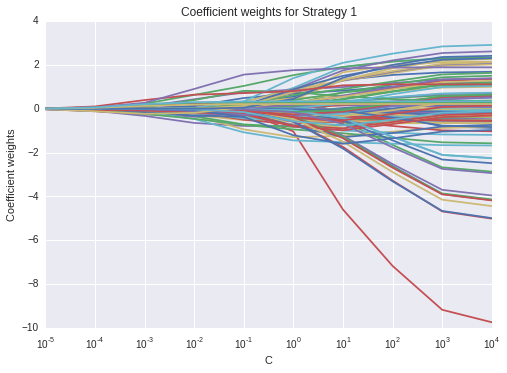

In [54]:
regularizationWeights(xs1,ys1,"Strategy 1")
#plt.savefig("plots/lrcoef_s1.png")

Coefficient weights for Strategy 2

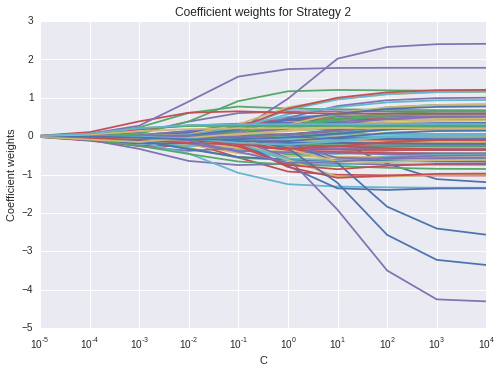

In [55]:
regularizationWeights(xs2,ys2,"Strategy 2")
#plt.savefig("plots/lrcoef_s2.png")

Coefficient weights for Strategy 3

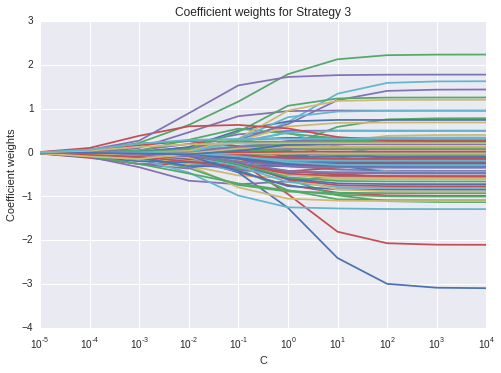

In [56]:
regularizationWeights(xs3,ys3,"Strategy 3")
#plt.savefig("plots/lrcoef_s3")

<a id="regvalcurves"></a>
<h3> Regularization parameter validation curves</h3>
<div style="text-align:right">
<a href="#top">[Back to top]</a>
</div>

In [58]:
np.concatenate([np.arange(1,10,1),np.arange(10,110,10)])

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  20,  30,  40,
        50,  60,  70,  80,  90, 100])

In [65]:
from sklearn.learning_curve import validation_curve

def regularizationValidationCurve(data,labs,title):
    crange = np.concatenate([np.arange(1,10,1),np.arange(10,110,10)])
    clf = LogisticRegression(penalty='l2',random_state=0)
    train_scores , test_scores = validation_curve(estimator=clf,
                                                  X = data,
                                                  y = labs,
                                                  param_name='C',
                                                  param_range=crange,
                                                  cv=10)
    train_mean = np.mean(train_scores,axis=1)
    train_std = np.std(train_scores,axis=1)
    test_mean = np.mean(test_scores,axis=1)
    test_std = np.std(test_scores,axis=1)

    plt.plot(crange,train_mean,color='blue',marker='o',markersize=5,label='training_accuracy')
    plt.fill_between(crange,train_mean+train_std,train_mean-train_std,alpha=.15,color='blue')
    plt.plot(crange,test_mean,color='green',marker='s',markersize=5,linestyle='--',label='test_accuracy')
    plt.fill_between(crange,test_mean+test_std,test_mean-test_std,alpha=.15,color='green')
    plt.grid(1)
    plt.xlim([0,120])
    plt.legend(loc='lower right')
    plt.xlabel('Regularization parameter')
    plt.ylabel('Accuracy')
    plt.ylim([.8,.9])
    plt.title("C Validation Curve for "+title)

Validation curve for Strategy 1

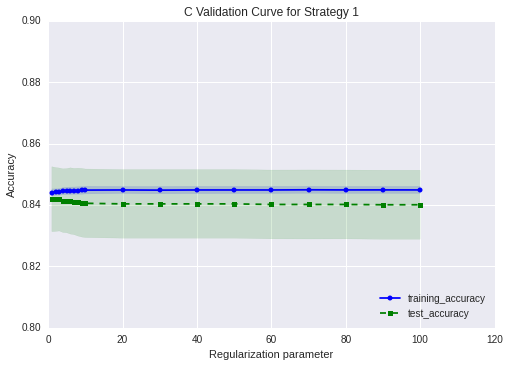

In [66]:
regularizationValidationCurve(xs1,ys1,'Strategy 1')
#plt.savefig("plots/valcurveS1.png")

Validation curve for Strategy 2

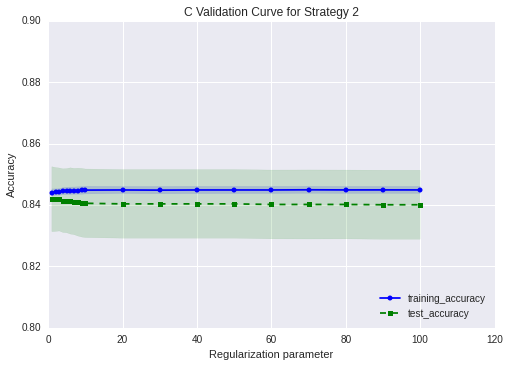

In [67]:
regularizationValidationCurve(xs1,ys1,'Strategy 2')
#plt.savefig("plots/valcurveS2.png")

Validation curve for Strategy 3

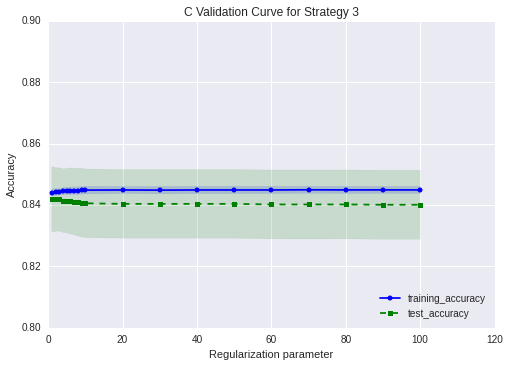

In [68]:
regularizationValidationCurve(xs1,ys1,'Strategy 3')
#plt.savefig("plots/valcurveS3.png")

<a id="bestlr"></a>
<h3> Best LR out of three</h3>
<div style="text-align:right">
<a href="#top">[Back to top]</a>
</div>

Stratisfied Cross Validation for Strategy 1 (Best Strategy for logistic regression)

In [113]:
LRCrossValidation(xs1,ys1,c=1)

Fold 1, Class dist.: [7200 2250], Acc: 0.83905
Fold 2, Class dist.: [7200 2250], Acc: 0.82571
Fold 3, Class dist.: [7200 2250], Acc: 0.84000
Fold 4, Class dist.: [7200 2250], Acc: 0.83714
Fold 5, Class dist.: [7200 2250], Acc: 0.84857
Fold 6, Class dist.: [7200 2250], Acc: 0.83905
Fold 7, Class dist.: [7200 2250], Acc: 0.84476
Fold 8, Class dist.: [7200 2250], Acc: 0.86762
Fold 9, Class dist.: [7200 2250], Acc: 0.84476
Fold 10, Class dist.: [7200 2250], Acc: 0.83238
CV Accuracy : 0.84190 +/- 0.01057


Stratisfied Cross Validation for Strategy 2

In [88]:
LRCrossValidation(xs2,ys2,c=1)

Fold 1, Class dist.: [7200 2250], Acc: 0.82762
Fold 2, Class dist.: [7200 2250], Acc: 0.82095
Fold 3, Class dist.: [7200 2250], Acc: 0.83429
Fold 4, Class dist.: [7200 2250], Acc: 0.83810
Fold 5, Class dist.: [7200 2250], Acc: 0.84381
Fold 6, Class dist.: [7200 2250], Acc: 0.83619
Fold 7, Class dist.: [7200 2250], Acc: 0.84762
Fold 8, Class dist.: [7200 2250], Acc: 0.86000
Fold 9, Class dist.: [7200 2250], Acc: 0.84190
Fold 10, Class dist.: [7200 2250], Acc: 0.83333
CV Accuracy : 0.83838 +/- 0.01030


Stratisfied Cross Validation for Strategy 3

In [92]:
LRCrossValidation(xs3,ys3,c=1)

Fold 1, Class dist.: [7200 2250], Acc: 0.84381
Fold 2, Class dist.: [7200 2250], Acc: 0.82476
Fold 3, Class dist.: [7200 2250], Acc: 0.83905
Fold 4, Class dist.: [7200 2250], Acc: 0.83905
Fold 5, Class dist.: [7200 2250], Acc: 0.84857
Fold 6, Class dist.: [7200 2250], Acc: 0.83333
Fold 7, Class dist.: [7200 2250], Acc: 0.83524
Fold 8, Class dist.: [7200 2250], Acc: 0.86952
Fold 9, Class dist.: [7200 2250], Acc: 0.84000
Fold 10, Class dist.: [7200 2250], Acc: 0.83238
CV Accuracy : 0.84057 +/- 0.01147


<a id="learncurve"></a>
<h3> Learning curve for LR and Strategy 1</h3>
<div style="text-align:right">
<a href="#top">[Back to top]</a>
</div>

In [98]:
from sklearn.learning_curve import learning_curve
from sklearn.utils import shuffle

def LRlearningCurve(data,labs):
    est = LogisticRegression(penalty='l2',random_state=0,C=1)
    data,labs = shuffle(data,labs)
    train_sizes,train_scores,test_scores = learning_curve(estimator=est,
                                                         X = data,
                                                         y = labs,
                                                         train_sizes = np.linspace(.1,1.,10),
                                                         cv=10)
    train_mean = np.mean(train_scores,axis=1)
    train_std = np.std(train_scores,axis=1)
    test_mean = np.mean(test_scores,axis=1)
    test_std = np.std(test_scores,axis=1)
    
    plt.plot(train_sizes,train_mean,
            color='blue',marker='o',
            markersize=5,
            label = 'Training Accuracy')
    plt.fill_between(train_sizes,train_mean+train_std,train_mean-train_std,alpha=.15,color='blue')
    
    plt.plot(train_sizes,test_mean,
            color='green',linestyle='--',
            marker='s',markersize=5,
            label = 'Test Accuracy')
    plt.fill_between(train_sizes,test_mean+test_std,test_mean-test_std,color='green',alpha=.15)
    
    plt.grid(1)
    plt.title("Learning curve for LR and Strategy 1")
    plt.xlabel("Number of training samples")
    plt.ylabel("Accuracy")
    plt.legend(loc='lower right')
    plt.ylim([0.8,.9])


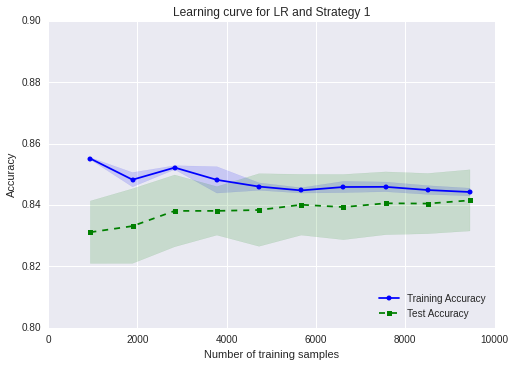

In [103]:
LRlearningCurve(xs1,ys1)
plt.savefig("plots/lrlearningcurve.png")

<a id="ada"></a>
<center> <h2> AdaBoost</h2></center>
<div style="text-align:right">
<a href="#top">[Back to top]</a>
</div>

In [31]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline

In [116]:
display(trainS1.head())
display(testS1.head())

,work_class,education,marital_status,occupation,relationship,race,sex,country,age,years_education,income_inv,loss_inv,work_hours,target
0,92.0,20.0,65.0,14.0,68.0,101.0,59.0,98.0,12.4140,4.1400,692.01,0.0,12.870,0
1,88.0,42.0,61.0,82.0,49.0,101.0,59.0,98.0,13.7300,3.1831,0.00,0.0,4.138,0
2,80.0,42.0,28.0,44.0,68.0,101.0,59.0,98.0,12.0960,2.8600,0.00,0.0,12.732,0
3,80.0,3.0,61.0,44.0,49.0,101.0,59.0,98.0,13.7300,2.2300,0.00,0.0,12.732,0
4,80.0,20.0,61.0,82.0,103.0,21.0,59.0,27.0,8.9127,4.1380,0.00,0.0,12.732,0


,work_class,education,marital_status,occupation,relationship,race,sex,country,age,years_education,income_inv,loss_inv,work_hours
0,80.0,90.0,65.0,85.0,99.0,101.0,37.0,98.0,7.6394,3.1831,0.0,0.00,5.7296
1,92.0,19.0,65.0,94.0,68.0,101.0,59.0,98.0,16.2340,3.5014,0.0,777.95,12.4140
2,80.0,42.0,61.0,82.0,49.0,101.0,59.0,98.0,19.7350,2.8648,0.0,0.00,12.8700
3,80.0,90.0,65.0,44.0,68.0,101.0,59.0,98.0,6.3662,3.1831,0.0,0.00,3.8197
4,80.0,19.0,61.0,14.0,49.0,101.0,59.0,98.0,13.3690,3.5014,0.0,0.00,10.1860


In [32]:
# A function for stratified cross validation of the Logistic Regression classifiers
def AdaCrossValidation(xs,labs,c=0.1,folds=10):
    scores = []
    skf = StratifiedKFold(y=labs,n_folds=folds,random_state=1)
    for k,(train_idx,test_idx) in enumerate(skf):
        
        tree = DecisionTreeClassifier(criterion='gini',max_depth=1)
        ada = AdaBoostClassifier(base_estimator=tree,n_estimators=380,learning_rate=1.2,random_state=0)
        
        ada.fit(xs[train_idx],labs[train_idx])
        score = ada.score(xs[test_idx],labs[test_idx])
        scores.append(score)
        print "Fold %s, Class dist.: %s, Acc: %.5f"%(k+1,
                                                    np.bincount(labs[train_idx]),
                                                    score)
    print "CV Accuracy : %.5f +/- %.5f"%(np.mean(scores),np.std(scores))
    #print scores

In [27]:
axs1 = trainS1.drop(['target'],axis=1).values
ays1 = trainS1.target.values

In [33]:
AdaCrossValidation(axs1,ays1)

Fold 1, Class dist.: [7200 2250], Acc: 0.86571
Fold 2, Class dist.: [7200 2250], Acc: 0.84571
Fold 3, Class dist.: [7200 2250], Acc: 0.85524
Fold 4, Class dist.: [7200 2250], Acc: 0.85524
Fold 5, Class dist.: [7200 2250], Acc: 0.87905
Fold 6, Class dist.: [7200 2250], Acc: 0.83810
Fold 7, Class dist.: [7200 2250], Acc: 0.86095
Fold 8, Class dist.: [7200 2250], Acc: 0.87429
Fold 9, Class dist.: [7200 2250], Acc: 0.86286
Fold 10, Class dist.: [7200 2250], Acc: 0.84095
CV Accuracy : 0.85781 +/- 0.01286


In [121]:
atxs1 = testS1.values
tree = DecisionTreeClassifier(criterion='gini',max_depth=1)
adaClf = AdaBoostClassifier(base_estimator=tree,
                           n_estimators=380,learning_rate=1.2,
                           random_state=0)
adaClf.fit(augxs,augys)
makeSubmission("adaAug2Clf",adaClf,atxs1)


Make submission for AdaBoostClassifier

In [289]:
atxs1 = testS1.values
tree = DecisionTreeClassifier(criterion='gini',max_depth=1)
adaClf = AdaBoostClassifier(base_estimator=tree,
                           n_estimators=380,learning_rate=1.2,
                           random_state=0)
adaClf.fit(axs1,ays1)
makeSubmission("adaClf",adaClf,atxs1)


Learning curve for AdaBoost

In [281]:
def adalearningCurve(data,labs):
    tree = DecisionTreeClassifier(criterion='gini',max_depth=1)
    est = AdaBoostClassifier(base_estimator=tree,
                           n_estimators=380,learning_rate=1.2,
                           random_state=0)
    data,labs = shuffle(data,labs)
    train_sizes,train_scores,test_scores = learning_curve(estimator=est,
                                                         X = data,
                                                         y = labs,
                                                         train_sizes = np.linspace(.1,1.,10),
                                                         cv=10)
    train_mean = np.mean(train_scores,axis=1)
    train_std = np.std(train_scores,axis=1)
    test_mean = np.mean(test_scores,axis=1)
    test_std = np.std(test_scores,axis=1)
    
    plt.plot(train_sizes,train_mean,
            color='blue',marker='o',
            markersize=5,
            label = 'Training Accuracy')
    plt.fill_between(train_sizes,train_mean+train_std,train_mean-train_std,alpha=.15,color='blue')
    
    plt.plot(train_sizes,test_mean,
            color='green',linestyle='--',
            marker='s',markersize=5,
            label = 'Test Accuracy')
    plt.fill_between(train_sizes,test_mean+test_std,test_mean-test_std,color='green',alpha=.15)
    
    plt.grid(1)
    plt.title("Learning curve for LR and Strategy 1")
    plt.xlabel("Number of training samples")
    plt.ylabel("Accuracy")
    plt.legend(loc='lower right')
    plt.ylim([0.8,.9])

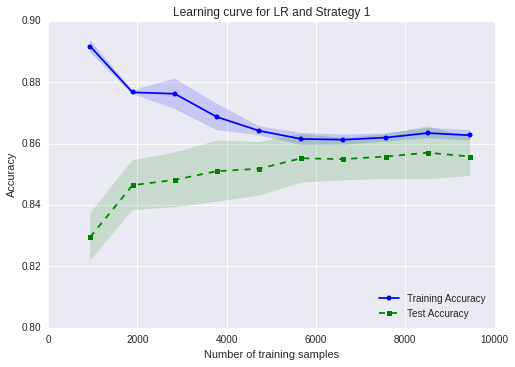

In [287]:
adalearningCurve(axs1,ays1)
plt.savefig("plots/adaLearningCurve.png")

<a id="gsestimators"></a>
<h3> Grid Search for number of  estimators</h3>
<div style="text-align:right">
<a href="#top">[Back to top]</a>
</div>

In [47]:
from sklearn.grid_search import GridSearchCV
tree = DecisionTreeClassifier(max_depth=1,criterion='gini')
adaclf = AdaBoostClassifier(base_estimator=tree,learning_rate=1.2,random_state=0)
param_range = np.arange(50,510,10)
param_grid = [{'n_estimators':param_range}]
gsest = GridSearchCV(estimator=adaclf,param_grid=param_grid,scoring='accuracy',cv=10)
gsest=gsest.fit(axs1,ays1)

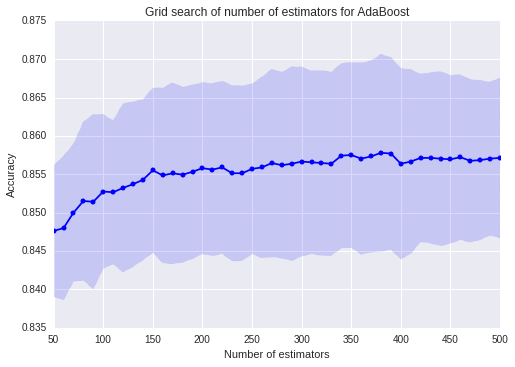

In [249]:
# For each parameter (n_estimators a 10-fold cross validation was executed)
estimators = []
means = []
stds = []

for tup in gsest.grid_scores_:
    estimators.append(tup[0]['n_estimators'])
    means.append(tup[1])
    stds.append(np.std(tup[2]))

estimators = np.array(estimators)
means = np.array(means)
stds = np.array(stds)

plt.plot(estimators,means,markersize=5,marker='o',color='blue')
plt.fill_between(estimators,means+stds,means-stds,linestyle='--',color='blue',alpha=.15)
plt.xlabel("Number of estimators")
plt.ylabel("Accuracy")
plt.title("Grid search of number of estimators for AdaBoost")
plt.grid(1)
plt.savefig("plots/gsAdaEstimators.png")

In [250]:
print "Best score with 10-fold CV over the number of estimators : %.5f achieved with %d estimators "%(gsest.best_score_,
gsest.best_params_['n_estimators'])

Best score with 10-fold CV over the number of estimators : 0.85781 achieved with 380 estimators 


<a id="gslearning"></a>
<h3> Grid Search for learning rate</h3>
<div style="text-align:right">
<a href="#top">[Back to top]</a>
</div>

In [235]:
np.arange(0.1,2.5,0.1)

array([ 0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,  1.1,
        1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,  2.2,
        2.3,  2.4])

In [238]:
tree = DecisionTreeClassifier(max_depth=1,criterion='gini')
adaclf = AdaBoostClassifier(base_estimator=tree,n_estimators=380,random_state=0)
param_range = np.arange(.1,2.5,.1)
param_grid = [{'learning_rate':param_range}]
gs = GridSearchCV(estimator=adaclf,param_grid=param_grid,scoring='accuracy',cv=10)
gs=gs.fit(axs1,ays1)

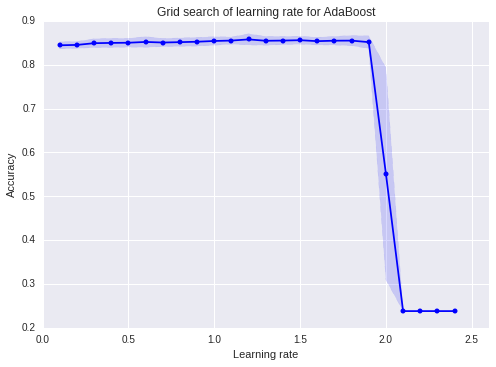

In [245]:
# For each parameter (n_estimators a 10-fold cross validation was executed)
estimators = []
means = []
stds = []

for tup in gs.grid_scores_:
    estimators.append(tup[0]['learning_rate'])
    means.append(tup[1])
    stds.append(np.std(tup[2]))

estimators = np.array(estimators)
means = np.array(means)
stds = np.array(stds)

plt.plot(estimators,means,markersize=5,marker='o',color='blue')
plt.fill_between(estimators,means+stds,means-stds,linestyle='--',color='blue',alpha=.15)
plt.xlabel("Learning rate")
plt.ylabel("Accuracy")
plt.title("Grid search of learning rate for AdaBoost")
plt.grid(1)
plt.xlim([0.0,2.6])
plt.savefig("plots/gsAdaLearningRate.png")

In [239]:
print gs.best_score_
print gs.best_params_

0.85780952381
{'learning_rate': 1.2000000000000002}


<h1> End of notebook</h1>

In [185]:
# pairs of features with missing values
pairs = []
for col in test.columns:
    subpair = []
    for col1 in test.columns:
        if col1==col:
            subpair.append(np.nan)
            continue
        else:
            subpair.append(test.isnull()[[col,col1]].all(axis=1).sum(axis=0))
    pairs.append(subpair)
pairs = np.array(pairs)

In [188]:
pd.DataFrame(pairs,columns=test.columns,index=test.columns)

,age,work_class,education,years_education,marital_status,occupation,relationship,race,sex,income_inv,loss_inv,work_hours,country
age,NaN,1723.0,1369.0,1352.0,1330.0,1668.0,1365.0,1370.0,1306.0,1365.0,1346.0,1339.0,1476.0
work_class,1723.0,NaN,1732.0,1689.0,1731.0,3413.0,1718.0,1716.0,1658.0,1600.0,1723.0,1731.0,1793.0
education,1369.0,1732.0,NaN,1314.0,1339.0,1660.0,1307.0,1366.0,1300.0,1328.0,1316.0,1345.0,1433.0
years_education,1352.0,1689.0,1314.0,NaN,1342.0,1602.0,1383.0,1327.0,1329.0,1347.0,1320.0,1356.0,1489.0
marital_status,1330.0,1731.0,1339.0,1342.0,NaN,1681.0,1384.0,1467.0,1357.0,1401.0,1370.0,1343.0,1435.0
occupation,1668.0,3413.0,1660.0,1602.0,1681.0,NaN,1731.0,1730.0,1677.0,1658.0,1714.0,1675.0,1805.0
relationship,1365.0,1718.0,1307.0,1383.0,1384.0,1731.0,NaN,1398.0,1393.0,1385.0,1363.0,1387.0,1484.0
race,1370.0,1716.0,1366.0,1327.0,1467.0,1730.0,1398.0,NaN,1360.0,1336.0,1380.0,1351.0,1472.0
sex,1306.0,1658.0,1300.0,1329.0,1357.0,1677.0,1393.0,1360.0,NaN,1278.0,1323.0,1324.0,1393.0
income_inv,1365.0,1600.0,1328.0,1347.0,1401.0,1658.0,1385.0,1336.0,1278.0,NaN,1293.0,1355.0,1467.0
